In [36]:
import json
from make_data import load_dict_from_json
from tools import *
from googletrans import Translator

In [35]:
database = load_dict_from_json('data/M0A_train_data.json')
test_sample = select_random_keys(database)

# EDA

In [31]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

language_databse = {}

# Ensure consistent results
DetectorFactory.seed = 0

# Use map() to apply the detection function without explicitly looping
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Detect languages
languages = list(map(detect_language, database.keys()))

# Output the results
for text, lang in zip(database.keys(), languages):
    language_databse[text] = lang


Counter({'fr': 3020, 'en': 481, 'pt': 134, 'unknown': 2, 'it': 1, 'vi': 1, 'so': 1})


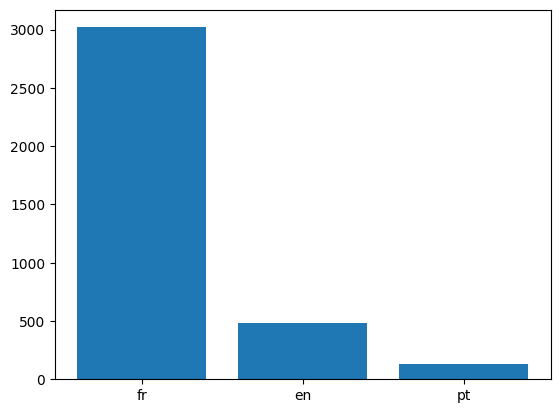

In [32]:
# count how many languages detected
from collections import Counter
language_count = Counter(languages)
print(language_count)

#plot the results but not for 'unknown', 'it', 'vi', 'so'
import matplotlib.pyplot as plt
import numpy as np

# Remove the 'unknown' language
del language_count['unknown']
del language_count['it']
del language_count['vi']
del language_count['so']

# Plot the results
plt.figure()
plt.bar(range(len(language_count)), list(language_count.values()), align='center')
plt.xticks(range(len(language_count)), list(language_count.keys()))
plt.show()

# Translation

In [43]:
import asyncio

async def translate_data(data):
    res = {}
    translator = Translator()
    for text in data:

        DetectorFactory.seed = 0
        try:
            lang = detect(text)
        except LangDetectException:
            lang = "unknown"

        if lang == 'pt' or lang == 'fr':
            translation = await translator.translate(text, dest='en')
            res[text] = translation.text
        else:
            res[text] = text

    return res

sample_trans = await translate_data(test_sample)